<a href="https://colab.research.google.com/github/GuiCoelhoDev/CoronaryDisease_Analysis/blob/main/Projeto1_160123046.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports and Load Dataset


In [3]:
import io
from google.colab import files
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [75]:
uploaded = files.upload()
df_not_preprocessed = pd.read_csv(io.BytesIO(uploaded['SA_heart.csv']))


Saving SA_heart.csv to SA_heart (6).csv


In [76]:
df_not_preprocessed

,id,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
0,1,160,12.00,5.73,23.11,Present,49,25.30,97.20,52,1
1,2,144,0.01,4.41,28.61,Absent,55,28.87,2.06,63,1
2,3,118,0.08,3.48,32.28,Present,52,29.14,3.81,46,0
3,4,170,7.50,6.41,38.03,Present,51,31.99,24.26,58,1
4,5,134,13.60,3.50,27.78,Present,60,25.99,57.34,49,1
...,...,...,...,...,...,...,...,...,...,...,...
457,459,214,0.40,5.98,31.72,Absent,64,28.45,0.00,58,0
458,460,182,4.20,4.41,32.10,Absent,52,28.61,18.72,52,1
459,461,108,3.00,1.59,15.23,Absent,40,20.09,26.64,55,0
460,462,118,5.40,11.61,30.79,Absent,64,27.35,23.97,40,0


# Pre Processing Data

In [77]:
# Transformando a feature 'famhist' em numérica para os modelos funcionarem
df=df_not_preprocessed
df['famhist']= df['famhist'].apply(lambda x: 1 if x=='Present' else 0)
df = df.drop(columns=['id'])
# df
df


,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
0,160,12.00,5.73,23.11,1,49,25.30,97.20,52,1
1,144,0.01,4.41,28.61,0,55,28.87,2.06,63,1
2,118,0.08,3.48,32.28,1,52,29.14,3.81,46,0
3,170,7.50,6.41,38.03,1,51,31.99,24.26,58,1
4,134,13.60,3.50,27.78,1,60,25.99,57.34,49,1
...,...,...,...,...,...,...,...,...,...,...
457,214,0.40,5.98,31.72,0,64,28.45,0.00,58,0
458,182,4.20,4.41,32.10,0,52,28.61,18.72,52,1
459,108,3.00,1.59,15.23,0,40,20.09,26.64,55,0
460,118,5.40,11.61,30.79,0,64,27.35,23.97,40,0


# Questão 1 - Quantidades médias e Desvios padrões das variáveis

In [78]:
mean_contents = df.describe().loc['mean']
std_contents = df.describe().loc['std']

array([138.32683983,   3.63564935,   4.74032468,  25.4067316 ,
         0.41558442,  53.1038961 ,  26.04411255,  17.04439394,
        42.81601732,   0.34632035])

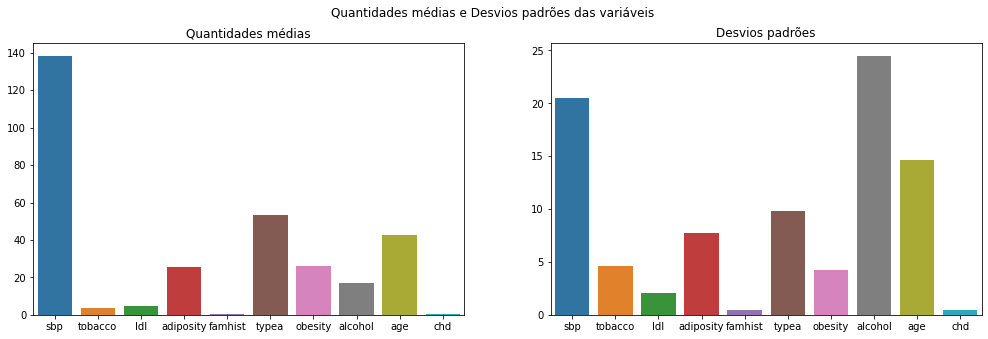

In [79]:
#@title Gráficos das Quantidades médias e Desvios padrões das variáveis
fig, axes = plt.subplots(1,2, figsize=(17,5))
fig.suptitle('Quantidades médias e Desvios padrões das variáveis')

sns.barplot(ax=axes[0], x=mean_contents.keys(), y = mean_contents.values)
axes[0].set_title("Quantidades médias")
sns.barplot(ax=axes[1], x=std_contents.keys(), y = std_contents.values)
axes[1].set_title("Desvios padrões")

plt.show()

Considerando esses resultados, percebe-se que não é possivel tirar grandes conclusões pelo fato dos valores de cada coluna não estarem normalizados. Portanto, vamos normaliza-los.

In [80]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_normalized = pd.DataFrame(scaler.fit_transform(df),columns=df.columns)
df_normalized

,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
0,0.504274,0.384615,0.331010,0.457902,1.0,0.553846,0.332497,0.660371,0.755102,1.0
1,0.367521,0.000321,0.239024,0.611748,0.0,0.646154,0.444479,0.013996,0.979592,1.0
2,0.145299,0.002564,0.174216,0.714406,1.0,0.600000,0.452949,0.025885,0.632653,0.0
3,0.589744,0.240385,0.378397,0.875245,1.0,0.584615,0.542346,0.164821,0.877551,1.0
4,0.282051,0.435897,0.175610,0.588531,1.0,0.723077,0.354141,0.389565,0.693878,1.0
...,...,...,...,...,...,...,...,...,...,...
457,0.965812,0.012821,0.348432,0.698741,0.0,0.784615,0.431305,0.000000,0.877551,0.0
458,0.692308,0.134615,0.239024,0.709371,0.0,0.600000,0.436324,0.127183,0.755102,1.0
459,0.059829,0.096154,0.042509,0.237483,0.0,0.415385,0.169072,0.180991,0.816327,0.0
460,0.145299,0.173077,0.740767,0.672727,0.0,0.784615,0.396801,0.162851,0.510204,0.0


Agora, vamos plotar os gráficos de novo

In [81]:
mean_contents = df_normalized.describe().loc['mean']
std_contents = df_normalized.describe().loc['std']

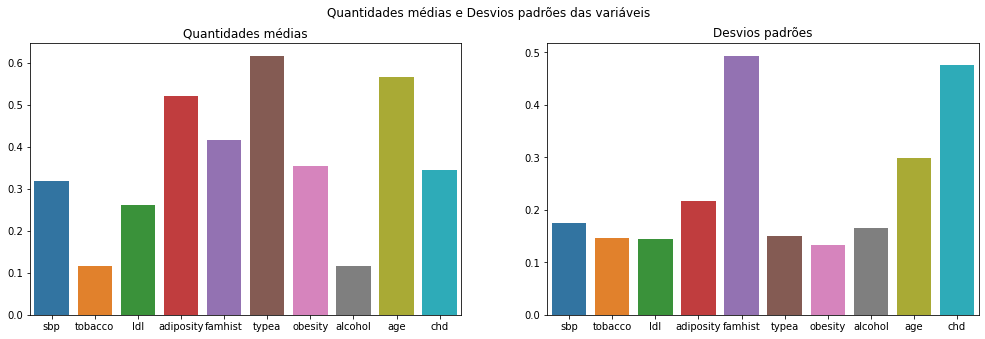

In [82]:
fig, axes = plt.subplots(1,2, figsize=(17,5))
fig.suptitle('Quantidades médias e Desvios padrões das variáveis')

sns.barplot(ax=axes[0], x=mean_contents.keys(), y = mean_contents.values)
axes[0].set_title("Quantidades médias")

sns.barplot(ax=axes[1], x=std_contents.keys(), y = std_contents.values)
axes[1].set_title("Desvios padrões")

plt.show()

Com os dados normalizados. Podemos perceber que o atributo 'famhist' (Que ou está presente ou ausente) é mais ausente do que presente pois sua média é menor que 0,5. Faz sentido seu desvio padrão ser alto pois seu valor ou é 1 (Presente) ou é 0 (Ausente).

Apesar dessas análises, não é possível ver quais atributos são mais relevantes para saber se uma pessoa tem ou não chd.

Portanto, apesar do projeto não pedir, faz sentido fazermos histogramas.

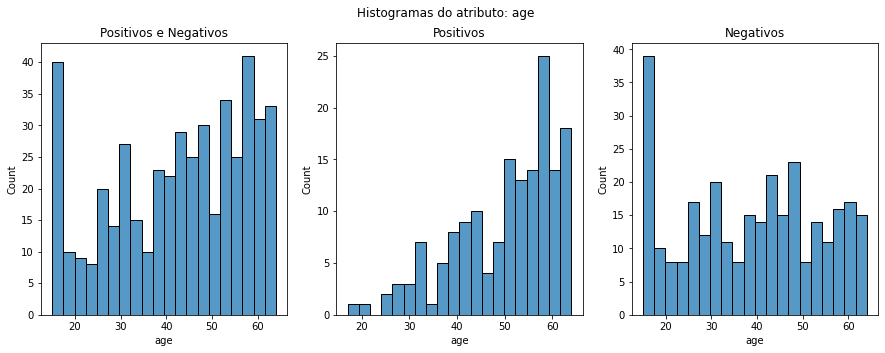

In [92]:
tested_positive = df.query('chd == 1')
tested_negative = df.query('chd == 0')

preditor_selecionado = 'age' #@param ['sbp', 'tobacco', 'ldl', 'adiposity', 'famhist', 'typea', 'obesity', 'alcohol', 'age']

fig, axes = plt.subplots(1,3, figsize=(15,5))
fig.suptitle('Histogramas do atributo: {}'.format(preditor_selecionado))
sns.histplot(ax = axes[0], data=df, x=preditor_selecionado, bins=20)
axes[0].set_title("Positivos e Negativos")

sns.histplot(ax = axes[1],data=tested_positive, x=preditor_selecionado, bins=20)
axes[1].set_title("Positivos")

sns.histplot(ax = axes[2],data=tested_negative, x=preditor_selecionado, bins=20)
axes[2].set_title("Negativos")
plt.show()


Baseado nos histogramas acima pode-se concluir:


1.   Quanto maior a idade, maior a chance de ser testado positivo
2.   alcohol, sbp, e ldl não parecem ser preditores muito úteis para classificação.
3.   A variável famhist é mais presente quando o paciente é testado positivamente. Enquanto a variável é mais ausente quando o paciente é testado negativamente.
4.  Incrivelmente, o fator obesidade e alcohol não é um preditor tão impactante quanto a idade, por exemplo.
5.  Inicialmente, achava que quanto maior o alcohol, obesity, tobacco, maior a chance de ser positivo. Porém, ao analisar os histogramas, percebe-se que a lógica é inversa. No caso do tobacco por exemplo, a maior parte se encontra perto do 0. E poucos se encontram perto de 40. Portanto, acredito que quanto menor o valor dessa variável, mais tabaco ela ingeriu. Pois não faz sentido pessoas que usarem mais tabaco terem menos chance de pegar do que quem não usou. Essa lógica se repete para alcohol
6. Percebe-se também que pacientes com ldl acima de 12 possuem muita chance de serem testados positivos para chd



A título de curiosidade, será feito a mesma análises de histogramas para os dados normalizados

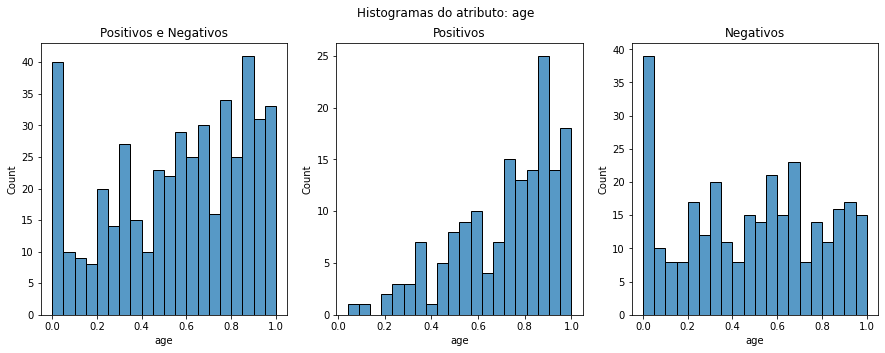

In [93]:
tested_positive = df_normalized.query('chd == 1')
tested_negative = df_normalized.query('chd == 0')

preditor_selecionado = 'age' #@param ['sbp', 'tobacco', 'ldl', 'adiposity', 'famhist', 'typea', 'obesity', 'alcohol', 'age']

fig, axes = plt.subplots(1,3, figsize=(15,5))
fig.suptitle('Histogramas do atributo: {}'.format(preditor_selecionado))
sns.histplot(ax = axes[0], data=df_normalized, x=preditor_selecionado, bins=20)
axes[0].set_title("Positivos e Negativos")

sns.histplot(ax = axes[1],data=tested_positive, x=preditor_selecionado, bins=20)
axes[1].set_title("Positivos")

sns.histplot(ax = axes[2],data=tested_negative, x=preditor_selecionado, bins=20)
axes[2].set_title("Negativos")
plt.show()


Percebe-se que o resultado tanto para dadados não normalizados quanto para normalizados é o mesmo

# Questão 2 - CART

In [112]:
X=df[df.columns]
y = df['chd'].values
type_of_print = X #@param ["X","y"] {type:"raw"}
print(type_of_print)



     sbp  tobacco    ldl  adiposity  famhist  typea  obesity  alcohol  age  chd
0    160    12.00   5.73      23.11        1     49    25.30    97.20   52    1
1    144     0.01   4.41      28.61        0     55    28.87     2.06   63    1
2    118     0.08   3.48      32.28        1     52    29.14     3.81   46    0
3    170     7.50   6.41      38.03        1     51    31.99    24.26   58    1
4    134    13.60   3.50      27.78        1     60    25.99    57.34   49    1
..   ...      ...    ...        ...      ...    ...      ...      ...  ...  ...
457  214     0.40   5.98      31.72        0     64    28.45     0.00   58    0
458  182     4.20   4.41      32.10        0     52    28.61    18.72   52    1
459  108     3.00   1.59      15.23        0     40    20.09    26.64   55    0
460  118     5.40  11.61      30.79        0     64    27.35    23.97   40    0
461  132     0.00   4.82      33.41        1     62    14.70     0.00   46    1

[462 rows x 10 columns]
